In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
data=pd.read_csv('Social_Network_Ads')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Taking Age and Salary as input to check the person has purchased the product or not
X=data.iloc[:,2:4].values

In [5]:
X.shape

(400, 2)

In [6]:
#Taking purchase column as output to check this experiment
y=data.iloc[:,-1].values

In [7]:
y.shape

(400,)

# Training the X and y

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [9]:
X_train.shape

(320, 2)

In [10]:
X_test.shape

(80, 2)

In [11]:
y_train.shape

(320,)

In [12]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [13]:
#we know that k=sqrt(No. of data in training set)
#So,here we have used k as 17 because in previous we have calculated the square root of the number of data in training set
# We also converted the 17.88854381999832 to integer 17 because K must be always an integer
k=17

In [14]:
#StandardScaler will transform data such that its distribution will have a mean value 0 and standard deviation of 1.
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [16]:
X_test=scaler.transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



# Applying KNN algorithm

In [17]:
knn=KNeighborsClassifier(n_neighbors=k)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [19]:
y_pred=knn.predict(X_test)

In [20]:
y_pred.shape

(80,)

In [21]:
accuracy_score(y_test,y_pred)

0.9125

In [22]:
#Now we have determined the value of K in one method
#The another method is try and error method, where we will notice in which point the accuracy score will be maximum
#So, we create a range of 1 to 20 to see that where the accuracy score will be maximum
accuracy=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,(knn.predict(X_test))))

In [23]:
accuracy

[0.85,
 0.875,
 0.9125,
 0.9,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125]

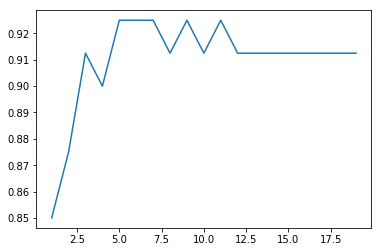

In [24]:
plt.plot(range(1,20),accuracy)

In [33]:
knn=KNeighborsClassifier(n_neighbors=11)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [35]:
y_prediction=knn.predict(X_test)

In [36]:
accuracy_score(y_test,y_prediction)

0.875

In [37]:
#We create the function where we give input as age and salary and will see whether the person will purchase the product or not
def predict_output():
    age=int(input("Enter your age: "))
    salary=int(input("Enter your salary: "))
    x=np.array([[age],[salary]]).reshape(1,2)
    x=scaler.transform(x)
    
    if (knn.predict(x)[0]==0):
        print("THE ANSWER:  Will not purchase")
    if (knn.predict(x)[0]==1):
        print("THE ANSWER:  Will purchase")

In [38]:
predict_output()

Enter your age: 45
Enter your salary: 690000
THE ANSWER:  Will purchase


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [39]:
predict_output()

Enter your age: 12
Enter your salary: 600000
THE ANSWER:  Will purchase


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



# Classifying every point on meshgrid

In [41]:
X_train.shape

(320, 2)

In [43]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)

a.shape

(607,)

In [45]:
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)

b.shape

(595,)

In [46]:
XX,YY=np.meshgrid(a,b)

In [48]:
XX.shape

(595, 607)

In [49]:
YY.shape

(595, 607)

In [50]:
595*607

361165

In [51]:
print(XX[0][0])
print(YY[0][0])

-2.9040130067379692
-2.5770499057236735


In [52]:
knn.predict(np.array([-2.9040130067379692,-2.5770499057236735]).reshape(1,2))

array([0], dtype=int64)

In [64]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [71]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# How ravel() function works

In [54]:
m=np.array([[1,2,3],[4,5,6]])
n=np.array([[7,8,9],[0,0,0]])

n

array([[7, 8, 9],
       [0, 0, 0]])

In [55]:
np.array([m.ravel(),n.ravel()])

array([[1, 2, 3, 4, 5, 6],
       [7, 8, 9, 0, 0, 0]])

# Plotting the array as an image

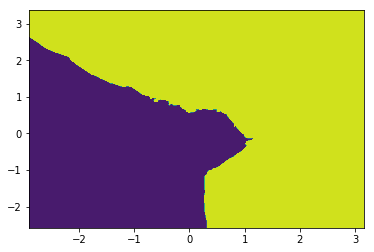

In [66]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

# Plotting all the training data on the plot

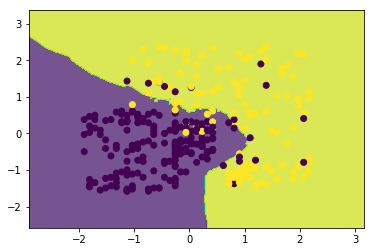

In [70]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)